# Recommendation Systems Lab: Building and Evaluating Book Recommenders

## Business Scenario

You work as a data scientist for ReadMore, an online bookstore that wants to improve user engagement through better book recommendations. The company has collected data on user ratings for various books and wants to build a recommendation system that can suggest books users are likely to enjoy.

Your task is to build and evaluate different recommendation algorithms using the Surprise library. This will allow ReadMore to personalize content for users and ultimately increase user satisfaction and conversion rates.

### RMSE as a Key Metric for Recommendation Systems

In the context of recommendation systems, Root Mean Square Error (RMSE) is a critical metric that measures the accuracy of predicted ratings. A lower RMSE indicates a more accurate recommendation system.

Why RMSE Matters for Book Recommendations:

- It measures the average magnitude of prediction errors
- It penalizes larger errors more heavily than smaller ones
- It's directly interpretable in the same units as the original ratings
- It allows for easy comparison between different recommendation algorithms

For ReadMore, minimizing RMSE means their recommendations will more closely match users' actual preferences, leading to:
- Increased user satisfaction
- Higher conversion rates for recommended books
- Enhanced user retention and platform loyalty
- More effective cross-selling opportunities

**You are expected to use RMSE to score and evaluate your recommendation models.**

## The Process

By the end of this lab, you will have:
1. Loaded and prepared data for Surprise modeling
2. Compared different recommendation algorithms
3. Tuned the hyperparameters of the best-performing algorithm
4. Evaluated the final model
5. Generated recommendations for specific users


## Step 0: Setup - Import Libraries

First, let's import all the necessary libraries for our recommendation system lab.

In [1]:
# CodeGrade step0
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Surprise library imports
from surprise import Dataset, Reader
from surprise import SVD, KNNBasic, KNNWithMeans, NMF, BaselineOnly
from surprise.model_selection import train_test_split, cross_validate, GridSearchCV, KFold
from surprise import accuracy

# Set random seed for reproducibility
np.random.seed(42)

## Step 1: Load and Prepare Ratings Data

The data provided contains user ratings for 1000 different book ids, on a rating scale of 1-5.

In [2]:
# CodeGrade step0
# Load in book ratings data
ratings_df = pd.read_csv('book_ratings.csv')
ratings_df.head()

,user_id,book_id,rating,timestamp
0,1,21,5.0,1712379068
1,1,35,1.0,1738339635
2,1,80,5.0,1718091323
3,1,138,5.0,1730958425
4,1,151,5.0,1724526598


Number of users: 500
Number of books: 1000
Number of ratings: 24401
Rating distribution:
rating
1.0    6294
2.0    2787
3.0    3102
4.0    3136
5.0    9082
Name: count, dtype: int64
Average rating: 3.24


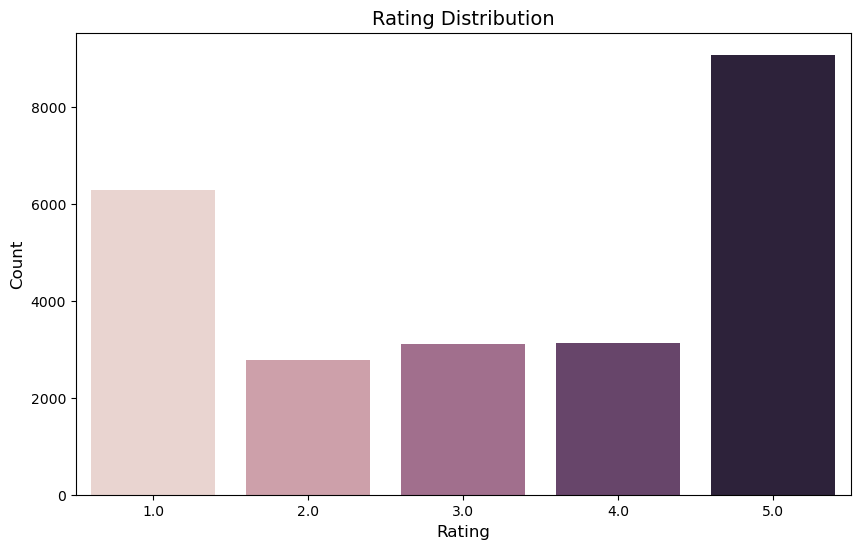

In [3]:
# Run this cell without changes
# Basic statistics about the generated dataset
print(f"Number of users: {len(ratings_df['user_id'].unique())}")
print(f"Number of books: {len(ratings_df['book_id'].unique())}")
print(f"Number of ratings: {len(ratings_df)}")
print(f"Rating distribution:\n{ratings_df['rating'].value_counts().sort_index()}")
print(f"Average rating: {ratings_df['rating'].mean():.2f}")

# Plot rating distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=ratings_df, hue='rating', legend=False)
plt.title('Rating Distribution', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Prepare Data for Surprise

Now, let's load our ratings data into a format suitable for the Surprise library.

In [4]:
# CodeGrade step1
# Replace None with your code
# Create a Reader object and specify the rating scale
reader = Reader(rating_scale=(1, 5))

# Load the data into the Surprise Dataset format
data = Dataset.load_from_df(ratings_df[['user_id', 'book_id', 'rating']], reader)

# Split the data into training and testing sets (75-25 split, random_state=42)
trainset, testset = train_test_split(data, test_size=0.25, random_state=42)

## Part 2: Algorithm Comparison

Now, let's compare different recommendation algorithms to see which one performs best on our dataset.

In [5]:
# CodeGrade step2
# Replace None with your code
# Define a list of algorithms to compare
algorithms = [
    SVD(random_state=42),
    KNNBasic(sim_options={'user_based': True}),  # User-based collaborative filtering
    KNNBasic(sim_options={'user_based': False}), # Item-based collaborative filtering
    KNNWithMeans(sim_options={'user_based': True}),
    NMF(random_state=42)
]

results = {}

for algo in algorithms:
    # Get the algorithm name
    algo_name = algo.__class__.__name__

    # For KNN algorithms, add user/item-based information
    if algo_name.startswith('KNN'):
        user_based = algo.sim_options.get('user_based', True)
        sim_option = 'User-based' if user_based else 'Item-based'
        algo_name = f"{algo_name} ({sim_option})"

    # Perform 5-fold cross-validation
    cv_results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)

    # Store the results
    results[algo_name] = {
        'RMSE': cv_results['test_rmse'].mean(),
        'MAE': cv_results['test_mae'].mean()
    }

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

Algorithm Comparison:
                   Algorithm      RMSE       MAE
2      KNNBasic (Item-based)  1.627101  1.437627
1      KNNBasic (User-based)  1.645572  1.445283
3  KNNWithMeans (User-based)  1.648170  1.431121
0                        SVD  1.650093  1.468028
4                        NMF  1.835455  1.523787


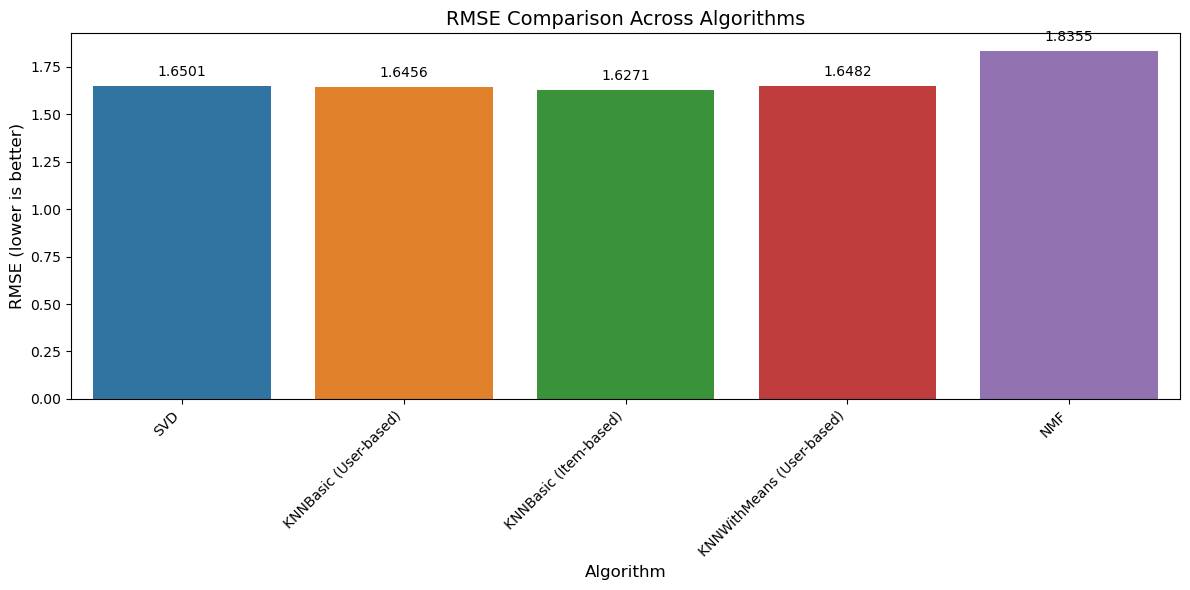

In [6]:
# Run this cell without changes
# Create a DataFrame from the results for easier visualization
results_df = pd.DataFrame({
    'Algorithm': list(results.keys()),
    'RMSE': [results[algo]['RMSE'] for algo in results],
    'MAE': [results[algo]['MAE'] for algo in results]
})

# Display the results table
print("Algorithm Comparison:")
print(results_df.sort_values('RMSE'))

# Visualize RMSE comparison
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Algorithm', y='RMSE', data=results_df, hue='Algorithm', legend=False)
plt.title('RMSE Comparison Across Algorithms', fontsize=14)
plt.xlabel('Algorithm', fontsize=12)
plt.ylabel('RMSE (lower is better)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add value labels on top of bars
for i, p in enumerate(ax.patches):
    ax.annotate(f'{p.get_height():.4f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'bottom',
                fontsize=10,
                rotation=0,
                xytext=(0, 5),
                textcoords='offset points')

plt.show()

## Part 3: Hyperparameter Tuning for SVD

Let's attempt to improve the SVD model by performing hyperparameter tuning. Given that it is the most complex we think there is this most room for improvement via tuning.

In [7]:
# CodeGrade step3
# Replace None with your code
# We'll assume SVD is the best algorithm for this example
# Define the parameter grid for SVD
param_grid = {
    'n_factors': [100, 150, 200],
    'n_epochs': [20, 30, 40],
    'lr_all': [0.005, 0.01, 0.05],
    'reg_all': [0.05, 0.1, 0.15],
    'random_state': [42]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(SVD,
        param_grid,
        measures=['rmse', 'mae'],
        cv=KFold(3, random_state=42),
        n_jobs=-1
)

# Fit the grid search to the data
grid_search.fit(data)

# Get the best parameters and score
# In Surprise, use best_params['rmse'] instead of best_params_
best_params_rmse = grid_search.best_params['rmse']
best_score_rmse = grid_search.best_score['rmse']

In [8]:
# Run this cell without changes
# Print the best parameters and score
print(f"Best RMSE: {best_score_rmse}")
print(f"Best parameters: {best_params_rmse}")

Best RMSE: 1.5328713838360972
Best parameters: {'n_factors': 150, 'n_epochs': 40, 'lr_all': 0.05, 'reg_all': 0.15, 'random_state': 42}


## Part 4: Final Model Evaluation

Now, let's train a final model with the best hyperparameters and evaluate its performance on the test set.

In [9]:
# CodeGrade step4
# Replace None with your code
# Create a final model with the best parameters (can use grid search to extract or create new)
final_model = SVD(**grid_search.best_params['rmse'])

# Train the model on training
final_model.fit(trainset)

# Make predictions on the test set
final_predictions = final_model.test(testset)

# Calculate RMSE on the test set
final_rmse = accuracy.rmse(final_predictions)

RMSE: 1.4780


In [10]:
# Run this cell without changes
print(f"Untuned Model Evaluation (CV RMSE): {results['SVD']['RMSE']}")
print(f"Final Model Tuned (CV RMSE): {best_score_rmse}")
print(f"Final Model Evaluation (Testset RMSE): {final_rmse}")

Untuned Model Evaluation (CV RMSE): 1.6500927908589145
Final Model Tuned (CV RMSE): 1.5328713838360972
Final Model Evaluation (Testset RMSE): 1.4780289518103105


## Part 5: Generating Final Recommendations

Finally, let's create a comprehensive function that can provide book recommendations for any user using our tuned model.

In [18]:
# CodeGrade step5
# Replace None with your code
# Build full trainset with all users
full_trainset = data.build_full_trainset()
# Fit final model to full trainset
final_model.fit(full_trainset)

def get_top_n_recommendations(model, data, user_id, n=10):
    """
    Generate top-N recommendations for a specific user

    Parameters:
    -----------
    model : surprise algorithm instance
        Trained model
    data : surprise.Trainset
        Full trainset (created above)
    user_id : str
        ID of the user for whom to generate recommendations
    n : int, default=10
        Number of recommendations to generate

    Returns:
    --------
    list of tuples
        (book_id, predicted_rating) sorted by predicted rating in descending order
    """
    # Get a list of all items
    all_items = data.all_items()

    # Convert raw user ID to inner ID used by the trainset
    try:
        inner_user_id = data.to_inner_uid(user_id)
    except ValueError:
        print(f"User {user_id} doesn't exist in the data set")
        return []

    # Get items rated by this user
    user_items = [j for (j, _) in data.ur[inner_user_id]]

    # Find items not rated by the user
    unrated_items = [item_id for item_id in all_items if item_id not in user_items]

    # Predict ratings for unrated items
    predictions = []
    for item_id in unrated_items:
        # Convert inner item ID back to raw ID for prediction
        raw_item_id = data.to_raw_iid(item_id)
        # Get prediction
        pred = model.predict(user_id, item_id)
        predictions.append((item_id, pred.est))

    # Sort predictions by estimated rating (highest first)
    predictions.sort(key=lambda x: x[1], reverse=True)

    # Return top n recommendations
    return predictions[:n]

In [19]:
# Run this cell without changes
# Test the recommendation function with a specific user
test_user_id = 150

# Get recommendations for the test user
top_recommendations = get_top_n_recommendations(final_model, full_trainset, test_user_id, n=50)

# Display recommendations
print(f"Top 5 Book Recommendations for User {test_user_id}:")
for i, (book_id, predicted_rating) in enumerate(top_recommendations, 1):
    print(f"{i}. Book ID: {book_id} - Predicted Rating: {predicted_rating:.2f}")

print(get_top_n_recommendations(final_model, full_trainset, 150, 5)[0][0])

Top 5 Book Recommendations for User 150:
1. Book ID: 967 - Predicted Rating: 4.84
2. Book ID: 310 - Predicted Rating: 4.83
3. Book ID: 772 - Predicted Rating: 4.77
4. Book ID: 721 - Predicted Rating: 4.73
5. Book ID: 768 - Predicted Rating: 4.68
6. Book ID: 830 - Predicted Rating: 4.68
7. Book ID: 953 - Predicted Rating: 4.63
8. Book ID: 904 - Predicted Rating: 4.61
9. Book ID: 989 - Predicted Rating: 4.61
10. Book ID: 682 - Predicted Rating: 4.57
11. Book ID: 542 - Predicted Rating: 4.57
12. Book ID: 991 - Predicted Rating: 4.55
13. Book ID: 345 - Predicted Rating: 4.51
14. Book ID: 466 - Predicted Rating: 4.50
15. Book ID: 157 - Predicted Rating: 4.46
16. Book ID: 829 - Predicted Rating: 4.45
17. Book ID: 90 - Predicted Rating: 4.43
18. Book ID: 639 - Predicted Rating: 4.42
19. Book ID: 971 - Predicted Rating: 4.41
20. Book ID: 392 - Predicted Rating: 4.40
21. Book ID: 924 - Predicted Rating: 4.39
22. Book ID: 190 - Predicted Rating: 4.38
23. Book ID: 491 - Predicted Rating: 4.36
24.

## Conclusion

Congratulations! You've successfully built a book recommendation system using the Surprise library. You've learned how to:

1. Prepare data for the Surprise library
2. Compare different recommendation algorithms
3. Tune hyperparameters to improve performance
4. Evaluate recommendation systems in Surprise
5. Create a comprehensive recommendation function

This knowledge can be applied to real-world recommendation systems across various domains like e-commerce, content streaming, news articles, and more.